## Linear Regression Analysis Report

This report outlines the process of performing linear regression analysis on a dataset to predict trip duration based on various features. The analysis includes checks for linearity, multicollinearity, outliers, and residual analysis, as well as training and evaluating both linear and ridge regression models. The following steps are implemented:

1. **Linearity Check**: A scatter plot is created to visualize the relationship between 'Distance (km)' and 'Trip Duration (min)'.
2. **Independence Check**: A heatmap displays the correlation matrix to identify multicollinearity among the features.
3. **Outlier Check**: A boxplot and histogram visualize the distribution of trip durations and identify potential outliers.
4. **Model Training - Linear Regression**: A linear regression model is trained on the training data, and predictions are made on the validation set.
5. **Residual Analysis**: The residuals are analyzed through scatter plots, histograms, and Q-Q plots to check for patterns and normality.
6. **Model Evaluation**: The root mean square error (RMSE) and R² score are calculated to evaluate the performance of the linear regression model.
7. **Model Training - Ridge Regression**: A ridge regression model is trained and evaluated, and predictions are made on the validation set.
8. **Prediction Visualization**: A scatter plot compares the actual trip durations with the predicted values from the linear regression model.

Now, let's see the code implementation.

## libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

- Load training and validation data

In [2]:
X_train = pd.read_csv('../data/splits/X_train.csv')
y_train = pd.read_csv('../data/splits/y_train.csv')
X_val = pd.read_csv('../data/splits/X_val.csv')
y_val = pd.read_csv('../data/splits/y_val.csv')

#### 1. Linearity Check
- Check linear relationship between 'Distance (km)' and 'Trip Duration'

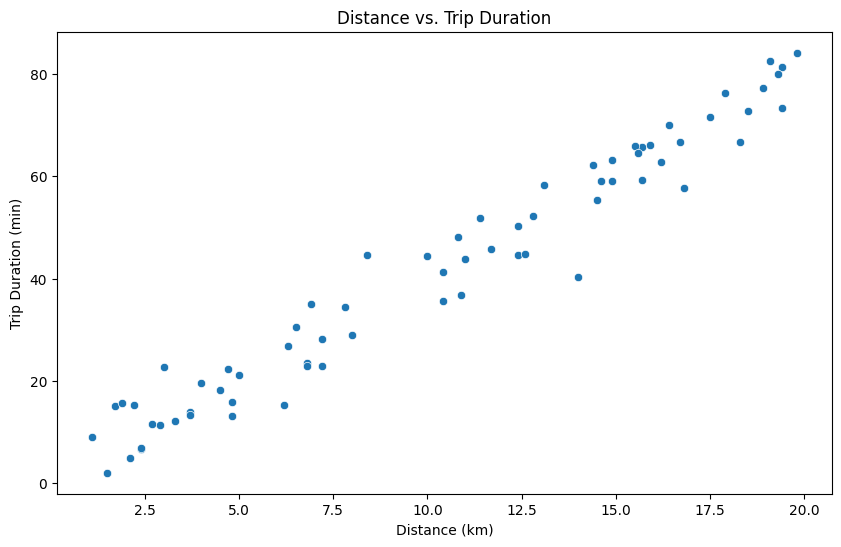

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Distance (km)'], y=y_train.squeeze())
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (min)')
plt.title('Distance vs. Trip Duration')
plt.show()

#### 2. Independence Check
- Correlation matrix to check for multicollinearity among features

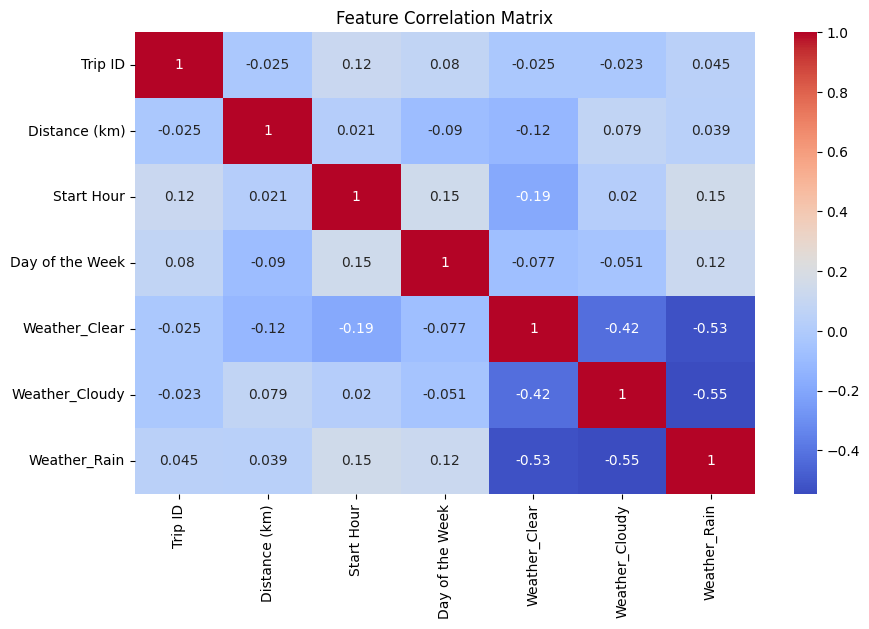

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()

#### 3. Outlier Check in Target Variable
- Boxplot to identify outliers in 'Trip Duration'

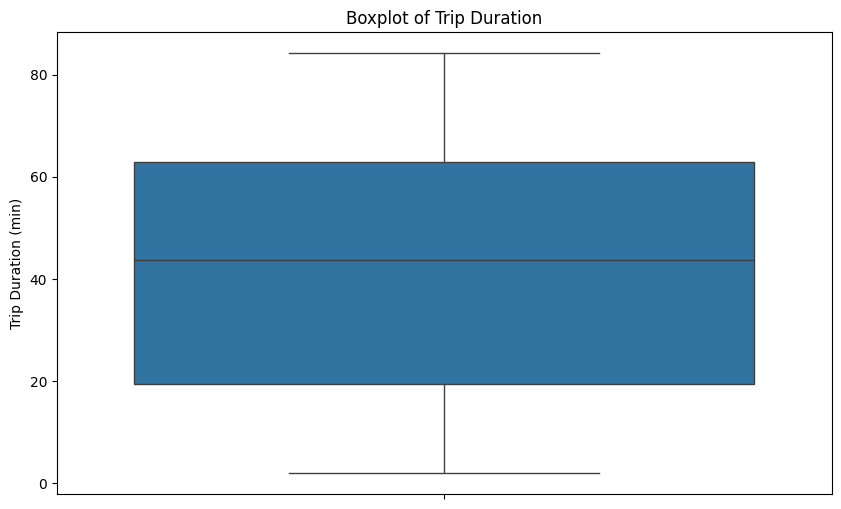

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train.squeeze())
plt.title('Boxplot of Trip Duration')
plt.ylabel('Trip Duration (min)')
plt.show()

##### Histogram of Trip Duration

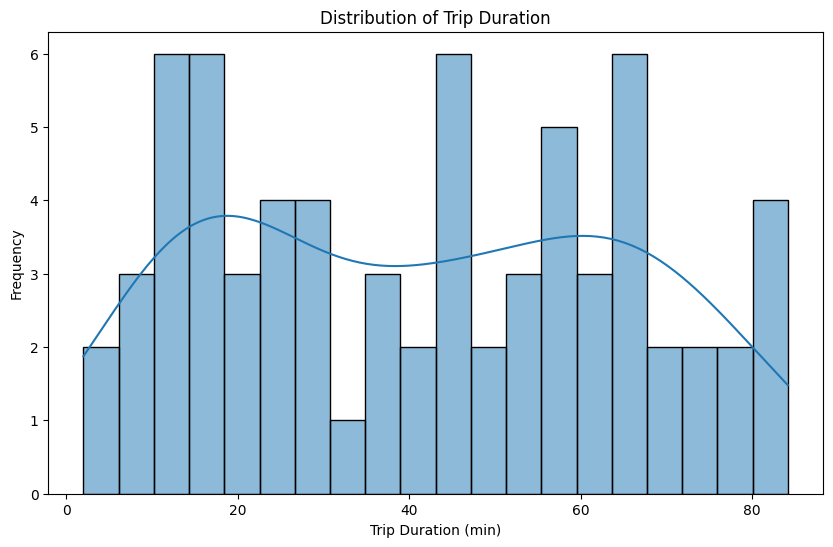

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train.squeeze(), bins=20, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Frequency')
plt.show()

#### 4. Model Training - Linear Regression
- Train a Linear Regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Make predictions on the validation set

In [8]:
y_pred = model.predict(X_val)

- Print shapes of y_val and y_pred

In [9]:
print("Shape of y_val:", y_val.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_val: (16, 1)
Shape of y_pred: (16, 1)


#### 5. Residual Analysis
- Calculate residuals by flattening the arrays to ensure they are 1D

In [10]:
residuals = y_val.values.flatten() - y_pred.flatten()

- ##### Residuals vs. Fitted Values
- Make predictions on the validation set

In [11]:
y_pred = model.predict(X_val)

- Check shapes before calculating residuals

In [12]:
print("Shape of y_val:", y_val.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_val: (16, 1)
Shape of y_pred: (16, 1)


- Calculate residuals

In [13]:
residuals = y_val.values.flatten() - y_pred.flatten()

- Assuming y_pred and residuals are 1D numpy arrays, convert them to Series

In [14]:
y_pred_series = pd.Series(y_pred.flatten())
residuals_series = pd.Series(residuals.flatten())


- Now plot using the Series

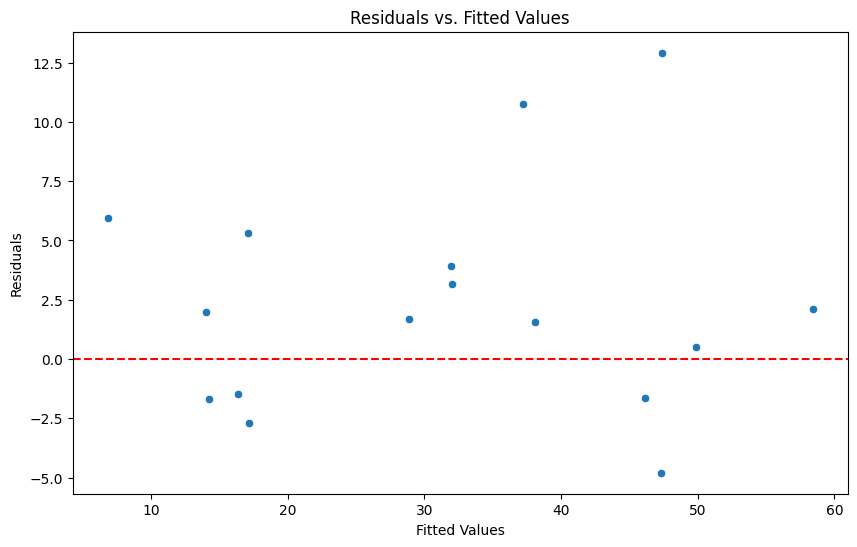

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_series, y=residuals_series)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

- Histogram of Residuals

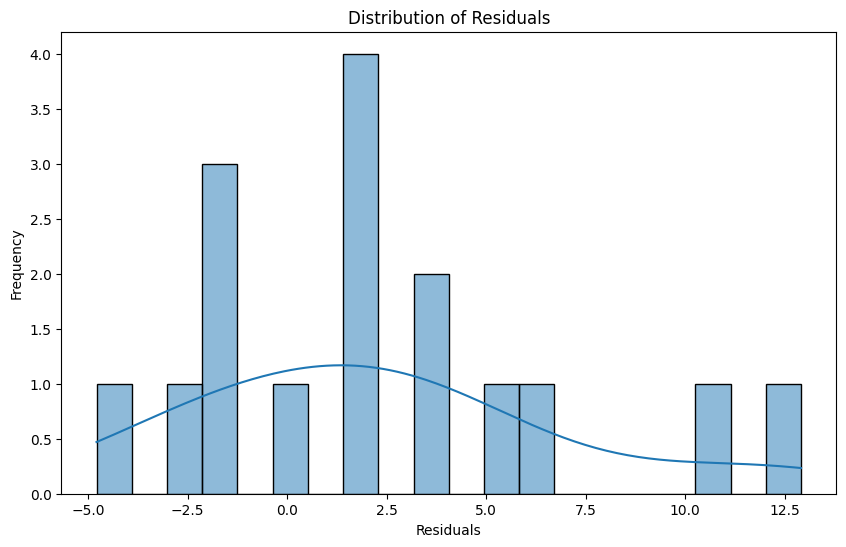

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### 6. Model Evaluation
- Make predictions on the validation set

In [17]:
y_pred = model.predict(X_val)
y_pred = model.predict(X_val)
y_pred = y_pred.flatten()  # Flatten the predictions to make them 1D

- Check the shapes to ensure they match

In [18]:
print("Shape of y_val:", y_val.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_val: (16, 1)
Shape of y_pred: (16,)


- Calculate RMSE and R² Score for the Linear Regression model

In [19]:
mse = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
r2 = r2_score(y_val, y_pred)
print(f"Linear Regression RMSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

Linear Regression RMSE: 5.14
Linear Regression R² Score: 0.90


/home/oops/lass/ml/Addis_Trip_Duration_Predictor/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 7. Model Training - Ridge Regression (with regularization)
- Train a Ridge Regression model

In [20]:
ridge_model = Ridge(alpha=1.0)  # Modify alpha as needed
ridge_model.fit(X_train, y_train)

Ridge()

- Make predictions and evaluate Ridge model

In [21]:
y_pred_ridge = ridge_model.predict(X_train)


- Generate predictions on the validation set (X_val) for Ridge

In [22]:
y_pred_ridge = ridge_model.predict(X_val)

-  Check shapes

In [23]:
print("Shape of y_val:", y_val.shape)
print("Shape of y_pred_ridge:", y_pred_ridge.shape)

Shape of y_val: (16, 1)
Shape of y_pred_ridge: (16, 1)


- Calculate RMSE and print

In [24]:
mse_ridge = mean_squared_error(y_val, y_pred_ridge, squared=False)
print(f"Ridge Root Mean Squared Error: {mse_ridge:.2f}")

Ridge Root Mean Squared Error: 5.13


/home/oops/lass/ml/Addis_Trip_Duration_Predictor/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 8.Prediction Visualization

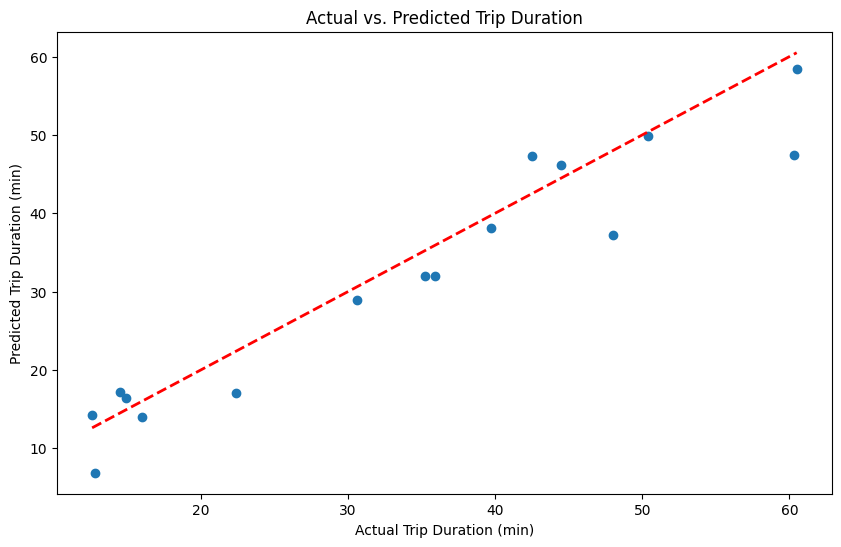

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Trip Duration (min)')
plt.ylabel('Predicted Trip Duration (min)')
plt.title('Actual vs. Predicted Trip Duration')
plt.show()

- Calculate residuals

In [26]:
residuals = y_val.squeeze() - y_pred

- Residuals vs. Fitted Values Plot

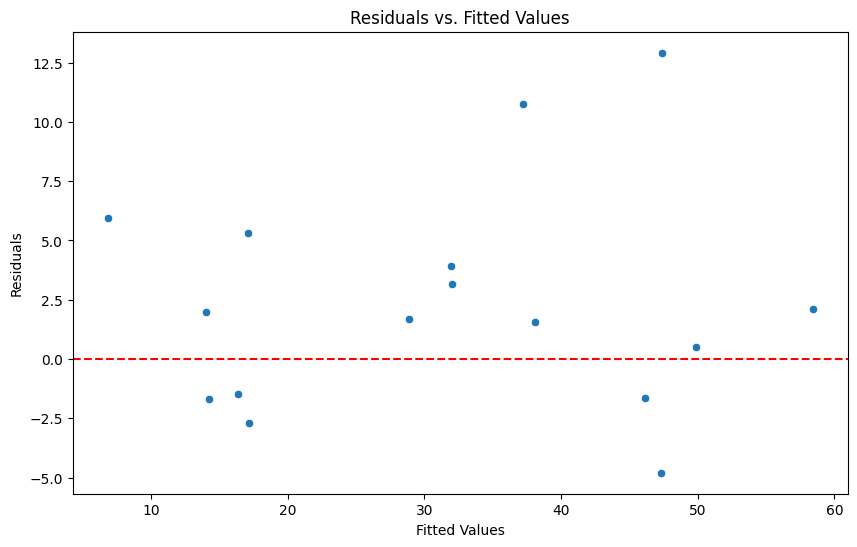

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

- Histogram of Residuals

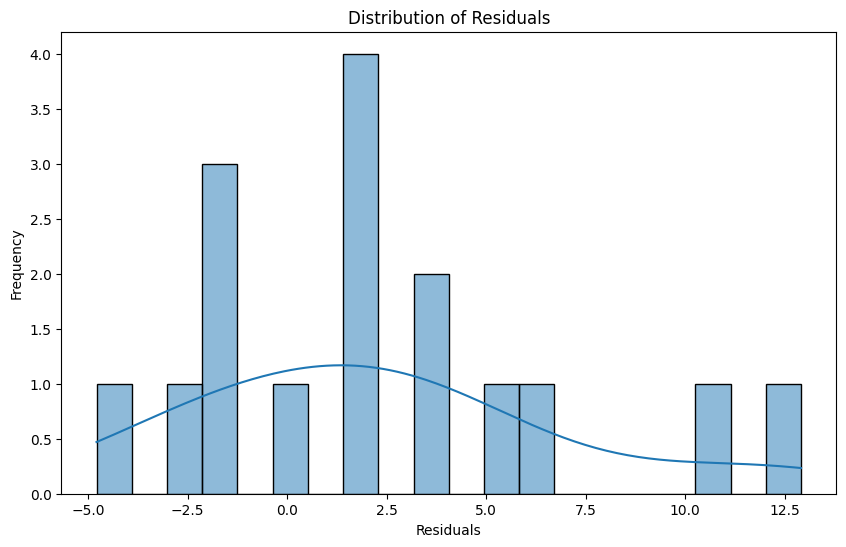

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

- Q-Q Plot for Residuals

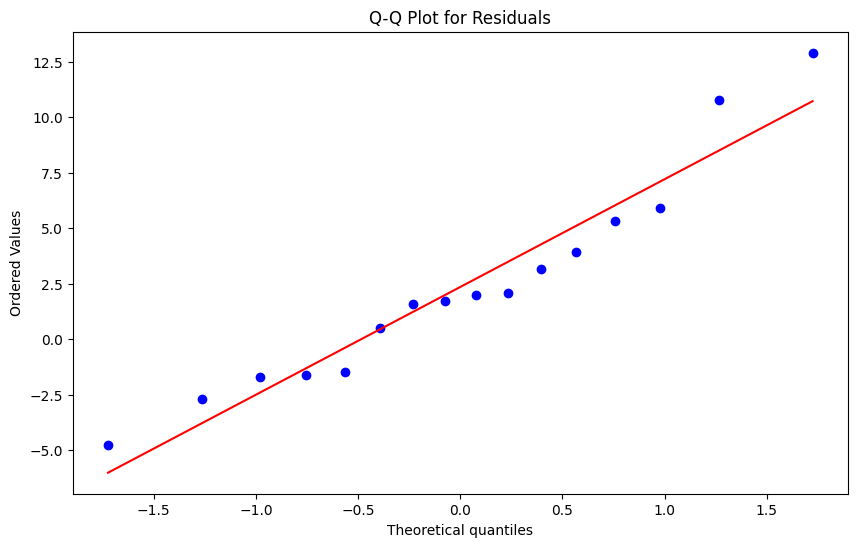

In [29]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()